# Homework 4: Big Data and Google Cloud

UIC CS 418, Spring 2022

_According to the **Academic Integrity Policy** of this course, all work submitted for grading must be done individually, unless otherwise specified. While we encourage you to talk to your peers and learn from them, this interaction must be superficial with regards to all work submitted for grading. This means you cannot work in teams, you cannot work side-by-side, you cannot submit someone else’s work (partial or complete) as your own. In particular, note that you are guilty of academic dishonesty if you extend or receive any kind of unauthorized assistance. Absolutely no transfer of program code between students is permitted (paper or electronic), and you may not solicit code from family, friends, or online forums. Other examples of academic dishonesty include emailing your program to another student, copying-pasting code from the internet, working in a group on a homework assignment, and allowing a tutor, TA, or another individual to write an answer for you. Academic dishonesty is unacceptable, and penalties range from failure to expulsion from the university; cases are handled via the official student conduct process described at https://dos.uic.edu/conductforstudents.shtml._

This homework is an individual assignment for all graduate students. Undergraduate students are allowed to work in pairs and submit one homework assignment per pair. There will be no extra credit given to undergraduate students who choose to work alone. The pairs of students who choose to work together and submit one homework assignment together still need to abide by the Academic Integrity Policy and not share or receive help from others (except each other).


## Due Date

This assignment is due at 11:59pm on April 15th, 2022.


### Instructions

You need to complete all code and answer all questions denoted by **Q#** in this notebook. When you are done, you should export **`hw4.ipynb`** with your answers as a PDF file, upload that file `hw4.pdf` to *Homework 4 - written* on Gradescope, tagging each question. 

Select your submission subdirectory `sub` and your completed Jupyter notebook (`hw4.ipynb` file) and zip it. As a result your `sub` subdirectory and `hw4.ipynb` file should be in the root of your zip file. Upload this zip file to *Homework 4 - code* on Gradescope. 

For undergraduate students who work in a team of two, only one student needs to submit the homework and just tag the other student on Gradescope.

**Keep an eye out for the following icons:**



<img src="./icons/edit.png" width="20px" heigh="20px" align="left">  Specifies that you need to add something to the notebook in order to get credit.


<img src="./icons/save.png" width="20px" height="20px" align="left">  Specifies that you need to save something to `sub` (submission) subdirectory or verify the existence of some file in `sub` to get credit.



<img src="./icons/warning.png" width="20px" height="20px" align="left">  Warnings to avoid common mistakes and pitfalls. Pay special attention to these.




#### Autograding

Q3 and Q4 will be graded based on your PDF submissions, the rest of the questions will be graded using an Autograder. All parts of Homework 4 are graded based on correctness, **not** based on completion.





## Before We Start

Before we dive into the assignment, we need to install the following python packages:

- seaborn*
- matplotlib*
- nltk*
- sklearn*
- pandas*
- numpy*
- google-cloud
- google-cloud-storage
- google-cloud-bigquery[pandas]

Packages marked with * should be pre-installed in a conda environment. You may install missing packages one at a time using `pip` command or you can run the following shell command to install them all at once:

In [1]:
!pip install -r ./requirements.txt > pip-log.txt


<img src="./icons/warning.png" width="20px" height="20px" align="left"> If you are installing using the shell command listed above then pay attention to any warnings and check the logs `pip-log.txt`.

Now, we are ready to import all dependencies.

In [2]:
from google.cloud import storage
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import os

%load_ext google.cloud.bigquery

We also need to ensure that we have required nltk packages installed:

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/malika/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/malika/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/malika/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Now that we have everything we need, we can dive into the homework itself.

## Cloud Services

Most real world systems in the modern world generate copious amount of data (billions of records) and in order to process this data and to enable reasoning through statistical models, we need high computational power and memory which is not available in most personal machiens.

One solution is to build and maintain your own clusters of high-end machines which has a massive overhead and cost associated with it, which is definitely not suitable for individuals or small teams. Hence, most individuals and companies rely on cloud service providers for a range of services, including but not limited to storage, processing, querying and visualizing large datasets.

In this homework, we will use [Google Cloud](https://cloud.google.com/) to query and visualize data and we will train and deploy a machine learning model in the cloud. The rest of the homework is divided in 4 parts.

**Part 0:** Setup: Initial configurations

**Part 1:** Big Query: A database for Big Data

**Part 2:** Data Studio: A visualization tool for Big Data

**Part 3:** AI Platform: Machine Learning with Big Data

These services can save a lot of time and make your life easier when handling a large amount of data which cannot be processed using a single machine. So let's get started!

## Part 0: Setup


### Setup Billing
Follow this [link](https://gcp.secure.force.com/GCPEDU?cid=%2Fos74HWCYOoMZ6Cna61Hfgre13ONNcYNIGbOYN9GjPcp5KzV%2BVf92ePVq9G9pYY6/) to claim \\$50 credit using your @uic.edu email. This homework can be completed while utilizing less than \\$5. Fill up the details in following form and it will send you an email to verify your account.

<img src='./screens/credit/00-first-form.png'>

After you have received your verification email (shown below), follow the link in email to request a coupon 

<img src='./screens/credit/01-verification-email.png'>

You will receive a coupon in email as shown below, follow the link to redeem it.

<img src="./icons/warning.png" width="20px" height="20px" align="left"><font color="red"> Be careful to redeem the coupon to your Google account with UIC email NOT your personal account.</font>

<img src='./screens/credit/02-coupon.png'>

Once you accept and add credit to your account, you will be sent to the following page (Navigation Menu -> Billing -> Overview).

<img src='./screens/credit/03-verify-credit.png'>

Verify that \$50 have been added to your billing account "Billing Account for Education" (default name) with credit name "CS 418 Introduction to Data Science". 


### Create Project

Google Cloud provides a common interface to manage and monitor all projects, this is called Google Cloud Console. First, you need to log into [Google Cloud Console](https://console.cloud.google.com/) using your university ID.

After logging in, you will land on a welcome page which, assuming you have not setup a project before, lists some popular services and tutorials shown below:

<img src='./screens/misc/welcome.png'>


Click on the dropdown "Select a Project" indicated by the red arrow in the image above and you will be taken to this menu:

<img src='./screens/misc/00-select-project.png'>

Click on the New Project button as shown above and it will take you to project form:

<img src="./screens/misc/01-name-project.png">


Name your project `homework4` and click *Create* button. And just as easily, your project is set up.

All the Google Cloud services are offered within the context of a project and once the project is created, you will be redirected to project dashboard (or Google Cloud Console) where you can add services to the project, monitor activity and manage billing etc.

<img src="./screens/misc/02-project-dashboard.png">

### Link Billing Account

Before, we proceed, we need to link a billing account to our project or verify that the previously created billing account is linked to our project automatically. First, ensure that the correct project is selected, then open the left sidebar menu using the button on top-left and select Billing.

<img src="./screens/credit/00-link-billing.png">

This will take you to a screen which specifies the billing account linked to your project. Verify that the linked account is "Billing Account for Education" with \$50 credits for "CS 418 Introduction to Data Science".

<img src="./icons/warning.png" width="20px" height="20px" align="left"> <font color='red'> You might have multiple billing accounts, as shown in the image below, in that case, make sure that the correct account is linked to avoid any unnecessary cost.</font>

<img src="./screens/credit/01-multiple-billing.png">

Now that our project is setup, let's add a service to it!

### Adding a Bucket

A bucket is just a storage container, it serves the same purpose as a cloud storage service (e.g. *Google Drive*) but it is more suitable for programmatic access and integration with other services as we will see later. Buckets are managed through a service *Cloud Storage* and we can add a bucket to our project through the sidebar (topleft menu) as shown in the following image:

<img src="./screens/bucket/00-select-storage.png" />

Before you add any service, make sure that your active project is the one you just created. Then you can select the sidebar menu by clicking on the top-left button and add services from the menu.

<img src="./icons/warning.png" width="20px" height="20px" align="left">   <font color='red'>Adding services may incur a high cost so only add what you need.</font>

Selecting *Browser* will take you to the following screen:

<img src="./screens/bucket/01-select-create.png" />

Click on the *Create Bucket* button as shown above and you will be taken to the following form:

<img width="600" height="800" src="./screens/bucket/01-create-bucket-name.png"/>
<img width="600" height="800" src="./screens/bucket/02-create-bucket-location.png"/>
<img width="600" height="800" src="./screens/bucket/03-create-bucket-type.png"/>
<img width="600" height="800" src="./screens/bucket/04-create-bucket-granularity.png"/>
<img width="600" height="800" src="./screens/bucket/05-create-bucket-security.png"/>


Fill out the form as shown above (use the provided links to learn more about these fields), however you need to enter a unique bucket name and press create. Now you should be able to view your bucket in a file browser like environment. We will come back to this later, first, let's set up authentication first so that we can communicate with Google Cloud.

### Setup Authentication

We will follow the simple steps listed in this tutorial ([Authentication tutorial](https://cloud.google.com/docs/authentication/getting-started)) to setup authentication.

First, we need to setup a service account, open the tutorial and click on "*Go To Create Service Account*" button and fill up the form as shown below. When the account is created, you will be prompted to download a JSON key, **save it in homework root directory as** `homework4-key.json`.

<img src="./screens/misc/00-auth-setup.png">
<img src="./screens/misc/01-auth-setup.png">
<img src="./screens/misc/02-auth-setup.png">
<img src="./screens/misc/03-auth-setup.png">

We can now setup an enviornment variable `GOOGLE_APPLICATION_CREDENTIALS` using the following python command, this enables the google cloud API to use the JSON key while making requests.

In [4]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'homework4-key.json'

Now, we can test our setup by making an authenticated API call to list buckets.

In [5]:
def list_buckets():
    storage_client = storage.Client()
    # Make an authenticated API request
    buckets = list(storage_client.list_buckets())
    print(buckets)

    
list_buckets()
# The expected output of this command should contain the name of your bucket
# [<Bucket: [YOUR BUCKET NAME]>]

[<Bucket: edu-uic-cs418-myelyu2-homework4>]


Using this JSON key, we can now communicate with server without having to explicitly log in.

<img src="./icons/warning.png" width="20px" height="20px" align="left">   `homework4-key.json` contains sensitive information that you should not share with anyone. Do not submit this file.

## Part 1: BigQuery

BigQuery is a large scale database which can process multiple GBs of data (e.g. all crime records in Chicago since 2001) within just a few seconds and provides the capacity to store and retrieve structured information which can either be used by your application or another cloud service. You can read more about it on the [project page](https://cloud.google.com/bigquery/).

One of the key strenghts of BigQuery is that it supports Structured Query Language (SQL) which is the de facto query language for Relational Databases in which data is stored in tabular form (just like pandas! but not in-memory). This enables the developers to query large databases without having to learn a new language, however, if you are not familiar with SQL or a simple refresher course then you can get a quick introduction at [W3 Schools](https://www.w3schools.com/sql/). 

Let's first go to BigQuery interface and explore some large scale public datasets. From the [project dashboard](https://console.cloud.google.com) select BigQuery from the sidebar:

<img width="300" height="500" src="./screens/bquery/01-select-bigquery.png" />


This will take you to the BigQuery interface. For this homework, we will be using publicly available chicago crime data which encompasses crime records in Chicago since 2001. It is already structured, cleaned and maintained by Google and we can just directly query it, however we can also add our own datasets to BigQuery if needed.

<img src="./screens/bquery/00-bigquery-data.png" />

Browse and select the table from the sidebar as shown in the figure and you will be able to see all the fields in the table and their description. You can also select *Preview* to show a subset of the dataset.

<img src="./screens/bquery/02-select-table.png" />


Let's run this simple query using the Query Editor

```
#standardSQL

SELECT * FROM `bigquery-public-data.chicago_crime.crime`
WHERE primary_type = "THEFT"
LIMIT 100;
```

This query will select the top 100 crime records of type theft form the crime dataset.

<img src="./icons/warning.png" width="20px" height="20px" align="left"> **\`** or backtick is a character which is not the same as an apostrophe or double quotes and is often used in SQL.

<img src="./icons/warning.png" width="20px" height="20px" align="left"> You always need to enter the prefix of the table or the dataset identifier *bigquery-public-data.chicago_crime* to access *crime* table.


<img src="./screens/bquery/03-query-results.png" />

In the figure above, you can see the results listed as a table. The Query editor shows you how much data it is going to process when the query runs so that you may estimate the cost. In this case, we are running this query on 1.3 GB of data within a few seconds. You may also export results in CSV format or explore them in Data Studio (a visualization portal that we will discuss later). Just like `pandas`, you may also perform a Group By operation and order the results using the following query:

```
SELECT primary_type, COUNT(*) as count FROM `bigquery-public-data.chicago_crime.crime`
GROUP BY primary_type
ORDER BY count;
```

The results are as follows:

<img width="400" src="./screens/bquery/04-query-group.png" />

## Q1 (20%)

<img src="./icons/edit.png" width="20px" height="20px" align="left"> Write an SQL query to extract the number of arrests/no-arrests per primary type for domestic-related cases, exclude "OTHER OFFENSE" and all non-criminal types, only consider records until the end of year 2021 and sort the results in ascending order by primary type and arrest.

<img src="./icons/save.png" width="20px" height="20px" align="left"> Take a screenshot (full screen, png format), rename it as `q1-results.png` and store it in `sub` subdirectory.

<img src="./icons/edit.png" width="20px" height="20px" align="left"> Include screenshot in the notebook by editing the following markdown (if needed). It shows as a broken image by default if screenshot is unavailable.

<img src="./sub/q1-results.png" align="center"/>

<br/>
<br/>

<img src="./icons/warning.png" width="20px" height="20px" align="left"><font color="red"> Refresh your browser if it does not appear right away.</font>

Since `pandas` and SQL operate on tables and offer similar functionality, we can transfer SQL results to a `pandas` data frame for further processing. One arduous way to do it is to first export results from BigQuery interface as a CSV file and load it in pandas, but there is a much better and convenient method available through the `bigquery` magic command. The following statement will run a query on the server and store results in the specified `df` dataframe, while running it shows the time elapsed.

In [6]:
%%bigquery df

-- This is an SQL comment


SELECT * FROM `bigquery-public-data.chicago_crime.crime`
WHERE primary_type = "THEFT"
LIMIT 100;

Downloading: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 66.70rows/s]


In [7]:
# We can now print a subset of these results using this familiar method
df.head()

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,4545973,HM132340,2006-01-19 02:50:00+00:00,066XX W HAYES AVE,0850,THEFT,ATTEMPT THEFT,VEHICLE NON-COMMERCIAL,False,False,...,41,10,06,1130658.0,1943067.0,2006,2018-02-28 03:56:25+00:00,42.000045,-87.794698,"(42.000045357, -87.794698273)"
1,8044404,HT276493,2011-05-02 05:00:00+00:00,022XX S ARCHER AVE,0880,THEFT,PURSE-SNATCHING,SIDEWALK,False,False,...,25,34,06,1174191.0,1889510.0,2011,2018-02-10 03:50:01+00:00,41.852220,-87.636152,"(41.852219635, -87.636152459)"
2,8137142,HT371226,2011-06-29 05:50:00+00:00,003XX W 47TH ST,0880,THEFT,PURSE-SNATCHING,SIDEWALK,False,False,...,3,37,06,1174906.0,1873794.0,2011,2018-02-10 03:50:01+00:00,41.809078,-87.633998,"(41.809077642, -87.633997804)"
3,8216681,HT450703,2011-08-15 09:00:00+00:00,088XX S PAXTON AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,...,8,48,06,1192378.0,1846694.0,2011,2018-02-10 03:50:01+00:00,41.734305,-87.570796,"(41.734305218, -87.570796177)"
4,3113298,HJ846122,2003-12-30 04:45:00+00:00,091XX S DREXEL AVE,0880,THEFT,PURSE-SNATCHING,SIDEWALK,False,False,...,8,47,06,1184152.0,1844591.0,2003,2018-02-28 03:56:25+00:00,41.728730,-87.600998,"(41.728730392, -87.60099764)"



<img src="./icons/edit.png" width="20px" height="20px" align="left"> Copy the query you wrote earlier to retrieve the number of arrests per each primary type for domestic-related cases in the following cell.

<img src="./icons/warning.png" width="20px" height="20px" align="left"> This is important!

In [8]:
%%bigquery q1df

-- Copy your SQL query below this line. (Make sure you rename the count aggregation as "counts")

SELECT primary_type, arrest, COUNT(*) as counts
FROM `bigquery-public-data.chicago_crime.crime`
WHERE year <= 2021 
    AND domestic = TRUE 
    AND primary_type NOT LIKE '%OTHER OFFENSE%' 
    AND primary_type NOT LIKE '%NON-CRIMINAL%' 
GROUP BY primary_type, arrest
ORDER BY primary_type, arrest;


Downloading: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54/54 [00:01<00:00, 44.16rows/s]


In [9]:
# We can now view a sample of our results
df = q1df.copy()
q1df.head()
# primary_type	arrest	counts
# 0	ARSON	False	417
# 1	ARSON	True	275
# 2	ASSAULT	False	88889
# 3	ASSAULT	True	19855
# 4	BATTERY	False	463715

,primary_type,arrest,counts
0,ARSON,False,417
1,ARSON,True,275
2,ASSAULT,False,88889
3,ASSAULT,True,19856
4,BATTERY,False,463714


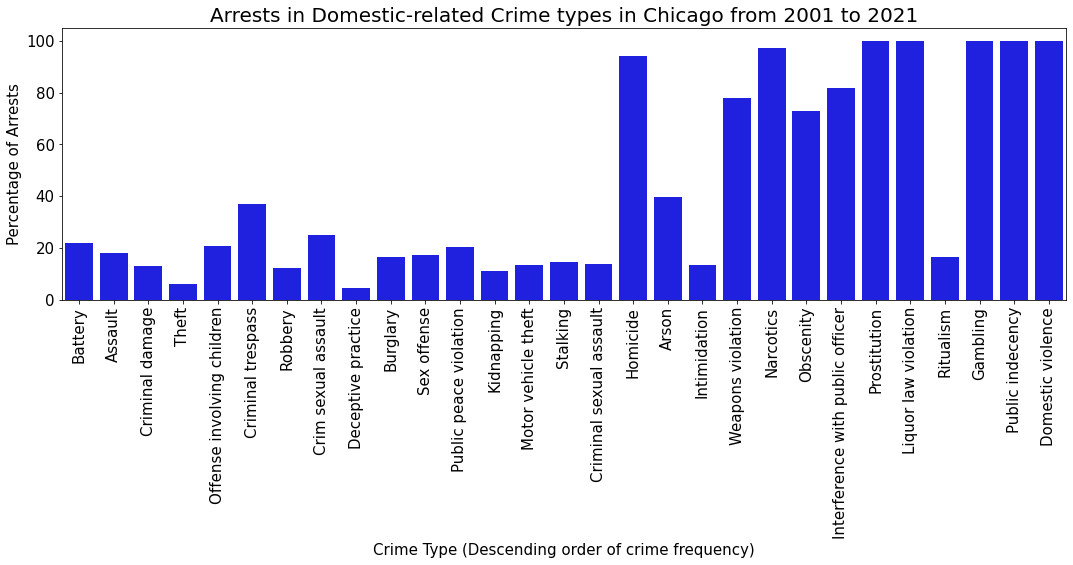

In [10]:
# Using the same dataframe, we can create a plot showing the fraction of arrests for each crime category
fig = plt.figure(figsize=(18, 5))

# Normalizing results
q1df["crime_freq"] = q1df.groupby("primary_type")["counts"].transform(lambda x:x.sum())
q1df["percentage"] = q1df["counts"].mul(100.0).divide(q1df["crime_freq"])
q1df["primary_type"] = q1df["primary_type"].apply(lambda x: x.capitalize())
norm_df = q1df[q1df["arrest"] == True]
norm_df = norm_df.sort_values(by="crime_freq", ascending=False)
# Standard sns barplot
ax = sns.barplot(x="primary_type", y="percentage", data=norm_df, color="b")
# Adding context to the plot
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Crime Type (Descending order of crime frequency)", fontsize=15)
plt.ylabel("Percentage of Arrests", fontsize=15)
plt.title("Arrests in Domestic-related Crime types in Chicago from 2001 to 2021", fontsize=20)
plt.show()

Your graph should look like the graph below:

<img src="./graph.png" />

In [11]:
# Now we can save this file in our submission subdirectory
# Note you are submitting results of your original query not processed dataframe
out_filepath = os.path.join("sub", "crime_arrests.csv")
df.to_csv(out_filepath, index=False)

<img src="./icons/save.png" width="20px" height="20px" align="left"> Check your `sub` (submission) subdirectory to verify that you have a file named `crime_arrests.csv`.

## Q2 (20%)

<img src="./icons/edit.png" width="20px" height="20px" align="left"> For each location category (column `location_description`) find the most frequent crime type. Your final results (in the CSV) should have three columns `location_description`, `primary_type`, `counts`. Where `location_description` is the category for different locations such as streets, residence, etc., `primary_type` is the most frequent crime on that location category and `counts` is simply the number of records associated with that crime. Exclude "OTHER OFFENSE", all non-criminal types and null values of `location-description`. Only consider records until the end of year 2021 and sort results in ascending order by `location_description`.

It would be simpler to first extract relevant counts using SQL and then find the most frequent one for each block using `pandas` but some SQL experts might be able to do it in a single SQL query.

In [12]:
%%bigquery q2df

#standardSQL
-- Write your query below this line

SELECT location_description, primary_type, arrest, COUNT(*) as counts
FROM `bigquery-public-data.chicago_crime.crime` 
WHERE year <= 2021 
    AND primary_type NOT LIKE '%OTHER OFFENSE%' 
    AND primary_type NOT LIKE '%NON-CRIMINAL%' 
    AND location_description IS NOT NULL 
GROUP BY primary_type, arrest, location_description
ORDER BY location_description;

Downloading: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4869/4869 [00:01<00:00, 4150.23rows/s]


In [13]:
# Write python code here for post-processing with pandas
_loc, _types = q2df['location_description'], q2df['primary_type']
unique_locations, unique_types = _loc.unique(), _types.unique()
newdf = pd.DataFrame(columns=['location_description', 'primary_type', 'counts'])

for i in range(len(unique_locations)):
    val, typ = -999, None
    for j in range(len(unique_types)):
        locs = q2df.loc[q2df['location_description'] == unique_locations[i]]
        types = locs.loc[locs['primary_type'] == unique_types[j]]
        counts = types['counts'].sum()
        if val < counts:
            val = counts
            typ = unique_types[j]
    newdf = newdf.append({'location_description': unique_locations[i], 'primary_type': typ, 'counts': val}, ignore_index=True)
newdf = newdf.sort_values('location_description')
q2df = newdf.copy()

In [14]:
# Let us see a subset of results
q2df.head(10)

,location_description,primary_type,counts
0,ABANDONED BUILDING,NARCOTICS,2985
1,AIRCRAFT,THEFT,357
2,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,THEFT,478
3,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,THEFT,457
4,AIRPORT EXTERIOR - NON-SECURE AREA,THEFT,224
5,AIRPORT EXTERIOR - SECURE AREA,THEFT,168
6,AIRPORT PARKING LOT,THEFT,321
7,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,CRIMINAL TRESPASS,865
8,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,THEFT,546
9,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,THEFT,49


In [15]:
# Now we can save this file in our submission subdirectory
out_filepath = os.path.join("sub", "freq_crime.csv")
q2df.to_csv(out_filepath, index=False)

<img src="./icons/save.png" width="20px" height="20px" align="left"> Check your `sub` (submission) subdirectory to verify that you have a file named `freq_crime.csv` following the format specified above.

## Part 2: Google Data Studio

In this part, we will explore a  tool called [Google Data Studio](https://datastudio.google.com) which allows us to create visualizations using large scale datasets. This tool can retrieve data from many sources (including BigQuery tables!) and provide a simple interface to create dynamic and sophisticated visualizations. Let's get started!


## Q3 (20%)

Credit will be awarded based on completion of this tutorial. We will try to replicate the graph we created earlier in **Q1**.

First, we need to create **a new (blank) report**, use your last name as the name of report with a suffix `-q3`, if your are working in group then the report name should be of the format `lastname1-lastname2-q3`.


You will be directed to the following screen after report is created. Select BigQuery as the data source.
<img src="./screens/dstudio/00-select-bquery-data.png"/>


Select the crime table from chicago_crime public dataset and click *Add* button.

<img src="./screens/dstudio/01-select-chicago-crime-data.png"/>


This will take you to add data interface with a default chart. Delete the chart and rename the report as instructed earlier. 

<img src="./screens/dstudio/02-rename-report.png"/>


Now that we have a data source added to the report, we can use it to create charts. Click *Add a chart* dropdown menu and select *100% stacked column chart* from it as shown below.


<img src="./screens/dstudio/03-add-chart.png"/>

Once, the chart is added, you can click on the chart to view Chart configurations in the right sidebar. Under *DATA*, we can configure fields and under *STYLE*, we can configure appearances of the chart. Setup the fields as shown in the figure below:

<img src="./screens/dstudio/04-stacked-100-chart.png"/>

Here, *Dimension* is the variable on the x-axis, *Breakdown Dimension* is the same as *hue* in seaborn. *Metric* specifies how you are going to aggregate records and *Sort* is just sorting on the x-axis. Something seems missing in this graph (can you spot it?)

Now, we need to use correct filters. Click on *ADD A FILTER* under *DATA* in the right sidebar and setup the appropriate filters as shown below:

<img src="./screens/dstudio/05-filter.png"/>


The graph we created earlier had a lot more bars than this one and this is because, by default, it only shows a subset of data. Let us fix that under the *STYLE* menu by setting *Bars* to a large number (200).


<img height="400" width="250" src="./screens/dstudio/06-chart-style-bars.png"/>


That should fix the bars, but we also want to label our axes. We can also do that in the *STYLE* menu by checking these boxes:

<img height="400" width="250" src="./screens/dstudio/06-chart-style-labels.png"/>


Now we can see all crime types and the axis labels but the labels are not very readable, we can change them by clicking the relevant areas highlighted by red arrows in the following figure.


<img src="./screens/dstudio/07-rename-labels.png"/>


Our graph is now almost ready, we can add title using *Text* tool from the toolbar and we can drag inner boundary (signified by dashed orange line in the figure below) to make our x-axis labels more visible. We can drag the external boundaries to stretch the graph and voila, with just a few clicks, we managed to create this graph from a large dataset.

<img src="./screens/dstudio/08-title-context.png"/>


### Submission

<img src="./icons/save.png" width="20px" height="20px" align="left"> Take a screenshot (full screen, PNG format), rename it as `q3-tutorial.png` and store it in `sub` subdirectory.

<img src="./icons/warning.png" width="20px" height="20px" align="left"> Make sure that the report name and graph is visible in the screenshot, no credit will be awarded otherwise.

<img src="./icons/edit.png" width="20px" height="20px" align="left"> Include screenshot in the notebook by editing the following markdown (if needed). It shows as a broken image by default if screenshot is unavailable.

<img src="./sub/q3-tutorial.png" />

<br/>

The report is now ready to be shared. Click the *Share* icon and get a Shareable link similar to Google docs:

<img src="./screens/dstudio/09-share.png" width="400" height="200" />


<img src="./icons/edit.png" width="20px" height="20px" align="left"> Copy the sharable link to report from the previous step into the box below. Anyone within the University of Illinois should be able to view this report without having to explicity request access.

<img src="./icons/warning.png" width="20px" height="20px" align="left"> No credit will be awarded without this link. Test this link in incognito mode of the browser.

<img src="./icons/warning.png" width="20px" height="20px" align="left"> DO NOT change/delete the report after submission.

https://datastudio.google.com/reporting/408bddc5-6404-4e5c-ba5d-13f2c3bf146b

## Q4 (20%)

This question is more open ended and similar to Q2.2-Q2.4 from *HW2*. It will be graded in the same way, based on the completeness of the report produced and the insights you gained from it.  We will be using the publicly avaialable chicago crimes dataset for this task and you are only required to produce a single graph.

Be sure to consider transformations, subsets, correlations, reference markers, and lines/curves-of-best-fit (as covered in Chapter 6 of PTDS) to reveal the relationship that you are wanting to learn more about.  Also be sure to make plots that are appropriate for the variable types.  For completeness, be explicit about any assumptions you make in your analysis.  An exemplary plot will have:

* A title
* Labelled and appropriately scaled axes
* A legend, if applicable
* A carefully selected color scheme
* A main point, accentuated through design choices


First, same as **Q3**, you need to create a new (blank) report, use your last name as the name of report with a suffix `-q4`, if your are working in group then the report name should be of the format `lastname1-lastname2-q4`.

<img src="./icons/warning.png" width="20px" height="20px" align="left"> No credit will be awarded if the report name is wrong.


<img src="./icons/warning.png" width="20px" height="20px" align="left"> Do not use the same report that you used in **Q3**

### Submission


<img src="./icons/edit.png" width="20px" height="20px" align="left"> Write your main takeaway/hypothesis 5-15 words in the following cell:

I want to analyze the tendency of a sex offenses in the city of Chicago. The main hypothesis is that the number of arrested people for this certain offense will increase throughout the years.

<img src="./icons/edit.png" width="20px" height="20px" align="left"> Write a description 100-150 words following cell explaining your assumptions and what you have found.

I wanted to see how well the police of Chicago work with crimes related to a sex offense and discovered that throughout all years (2001-2022) the number of arrested people was significantly lower than those who were not arrested. The tendency of arrests is dropping every year while the number of crimes stays the same. The worst numbers were shown in 2022 (it might be because the data is incomplete) but still, in the year 2021, the number of arrested people for sex offences was equal to 69 while unarrested 995 which is very upsetting. 


<img src="./icons/save.png" width="20px" height="20px" align="left"> Take a screenshot (full screen, PNG format), rename it as `q4-report.png` and store it in `sub` subdirectory.

<img src="./icons/warning.png" width="20px" height="20px" align="left"> Make sure that the report name and graph is visible in the screenshot, no credit will be awarded otherwise.

<img src="./icons/edit.png" width="20px" height="20px" align="left"> Include screenshot in the notebook by editing the following markdown (if needed). It shows as a broken image by default if screenshot is unavailable.



<img src="./sub/q4-report.png" />

<br/>

<img src="./icons/edit.png" width="20px" height="20px" align="left"> Create a sharable link to this report using the process shown in **Q3** and add it in the next cell. Anyone within the university should be able to view this report without having to explicity request access.

<img src="./icons/warning.png" width="20px" height="20px" align="left"> No credit will be awarded without this link. Test this link in incognito mode of the browser.

<img src="./icons/warning.png" width="20px" height="20px" align="left"> DO NOT change/delete the report after submission.

https://datastudio.google.com/reporting/85f971cb-b509-45db-bd8f-c68e095c61ed

## Part 3: Google Cloud AI Platform

In this part, we will use [Google Cloud AI Platform](https://cloud.google.com/ai-platform/docs) to train and deploy a simple machine machine learning model. Training models from large datasets is a particularly tedious task, especially if it involves hyper-parameter tuning and training may take days to complete and require high computational powers and multiple CPUs/GPUs/TPUs. Google Cloud AI Platform addressess all these problems. Let's get started!


## Q5 (20%)

Credit will be awarded based on completion of this tutorial. Same, as before, we will train our model using tweets dataset from *HW3* and make predictions on the test set, however we will do all that using Google Cloud AI Platform.

Twitter data is extracted using [this](https://dev.twitter.com/overview/api) api. The data contains tweets posted by the following six Twitter accounts: `realDonaldTrump, mike_pence, GOP, HillaryClinton, timkaine, TheDemocrats`

For every tweet, there are two pieces of information:
- `screen_name`: the Twitter handle of the user tweeting and
- `text`: the content of the tweet.

The tweets have been divided into two parts - train and test available to you in CSV files. For train, both the `screen_name` and `text` attributes were provided but for test, `screen_name` is hidden.

The overarching goal of the problem is to "predict" the political inclination (Republican/Democratic) of the Twitter user from one of his/her tweets. The ground truth (i.e., true class labels) is determined from the `screen_name` of the tweet as follows
- `realDonaldTrump, mike_pence, GOP` are Republicans
- `HillaryClinton, timkaine, TheDemocrats` are Democrats

Thus, this is a binary classification problem.

The code to create features from data and to create labels is provided below, you do not need to re-write it. Run the following cells to generate data in a [format](https://cloud.google.com/ai-platform/training/docs/algorithms/preprocessing-data) that the AI Platform can understand.

<img src="./icons/warning.png" width="20px" height="20px" align="left"> DO NOT change this code or use code form *HW3*


In [16]:
def create_labels(processed_tweets):
    return (~processed_tweets['screen_name'].isin(['realDonaldTrump', 'mike_pence', 'GOP'])).astype(int).values

In [17]:
def setup_traintest():
    # Setup training and testing paths
    train_path = os.path.join('data', 'tweets_train.csv')
    train_gcinput_path = os.path.join('data', 'train_gcinput.csv')

    test_path = os.path.join('data', 'tweets_test.csv')
    test_gcinput_path = os.path.join('data', 'test_gcinput.json')

    # Setup vectorizer and PCA
    eng_stopwords = set(stopwords.words('english'))
    vec = TfidfVectorizer(stop_words=eng_stopwords, max_df=0.8, min_df=3, max_features=5000)
    pca = PCA(n_components=300)


    # Setup training data
    train_df = pd.read_csv(train_path)
    train_feat = vec.fit_transform(train_df['text'])
    train_feat = pca.fit_transform(train_feat.todense())
    train_lab = create_labels(train_df)
    df_feat = pd.DataFrame(train_feat)
    df_lab = pd.DataFrame(train_lab)
    df = pd.concat([df_lab, df_feat], axis=1)
    df.to_csv(train_gcinput_path, index=False, header=False)
    # Setup testing data
    test_df = pd.read_csv(test_path)
    test_feat = vec.transform(test_df['text']).todense()
    test_feat = pca.transform(test_feat)
    df = pd.DataFrame(test_feat)
    def online_prediction_format(row):
        key = row.name
        value = str(row.values.tolist()).replace("[", "").replace("]","")
        instance = {'key':str(key), 'csv_row':value}
        return instance
    df = df.apply(lambda x: online_prediction_format(x), axis=1)
    df.to_json(test_gcinput_path,orient='records', lines=True)

In [18]:
setup_traintest()

/opt/anaconda3/envs/cs418env/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/opt/anaconda3/envs/cs418env/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


This code should produce two files `train_gcinput.csv` and `test_gcinput.json` in the `data` subdirectory. `train_gcinput.csv` contains labels in first column and features in remaining columns for each record and `test_gcinput.json` just contains the features and unique key for each record as a JSON instance required by the [prediction](https://cloud.google.com/ai-platform/prediction/docs/overview?hl=en_US) service. There are 300 features for each record.

**Side Note:** PCA is a [dimensionality reduction algorithm](https://medium.com/@mayur87545/dimensionality-reduction-1663f960293f) which makes our file size smaller and our computations simpler. 

### Uploading Data to Cloud

Before we can train our algorithm, we need to upload `train_gcinput.csv` to the cloud so that the ML engine can access it. But how do we do that?

In *Part 0*, we created a bucket which makes it easier to store files on the cloud and enables different Google Cloud services to access those files. You can think of buckets as folders and all the services on cloud as applications which have access to these folders.


Go to [Google Cloud Console](https://console.cloud.google.com/) and you should be able to see *Storage* under *Resources* card on project *Dashboard*. Click on it and it will take you to *Storage Browser*. Select your bucket and upload `train_gcinput.csv` in the root of the bucket. Create a new subdirectory in the root of the bucket and name it as `output`, we will use it later to store logs and trained model. It should like the following figure:

<img src="./screens/mlengine/01-upload-files.png" />


### Training the Model

Now, we have all the files necessary to train our model. Go to [Google Cloud Console](https://console.cloud.google.com) and from the sidebar, select *AI Platform > Jobs* as shown in the following figure.

<img height="500" width="500" src="./screens/mlengine/02-select-jobs.png" />


If you have not used *Jobs* before then you first need to Enable API to use this service. Click *ENABLE API* (it might take a while).

<img src="./screens/mlengine/03-enable-api.png" />

Google cloud provides some built-in models which can be trained on any dataset. Once, the API is enabled, click on *NEW TRAINING JOB* and select *Built-in algorithm training* from the dropdown as shown below:


<img src="./screens/mlengine/04-builtin.png" />

We will use a built-in linear classifier for training. Select *Linear Learner* as your training algorithm and click *NEXT*

<img src="./screens/mlengine/05-select-model.png" />

Click *BROWSE* and select `train_gcinput.csv` from the bucket under *Training data path* and setup the remaining arguments as shown in the following screenshot. The validation data is used while training the model for hyper-parameter tuning and we will also use 10% of the training data as Test data for model evaluation. Note that this is not the final test data that we will be using for predictions. Click *NEXT*.

<img src="./screens/mlengine/06-select-data.png" />

Select model type as classification and leave everything as is, click *NEXT*.


<img src="./screens/mlengine/07-arguments.png" />

In the job setup, you can specify a *Job ID* and the [type of machine](https://cloud.google.com/ai-platform/training/docs/machine-types) you want to run this on. We will run this job on a standard_gpu machine. Note that there are other high-end machines available as well. Click *DONE*.

<img src="./icons/warning.png" width="20px" height="20px" align="left"> High-end machines may incur high computational cost and built-in models do not have the capacity to fully utilize them. [Details](https://cloud.google.com/ai-platform/training/docs/algorithms/linear-learner).

<img src="./screens/mlengine/08-job-setup.png" />


Your job should be up and running now and you should be able to see a list of running jobs:

<img src="./screens/mlengine/09-job-list.png" />

You can open a job by clicking on Job ID. This will take you to the job progress page (shown below) where you can mointor resources being used by the job, job logs, parameters and progress. Click on View Logs to view and stream the logs, if something goes wrong then you should be able to see it in the logs.

<img src="./screens/mlengine/10-job-progress.png" />

When the job is completed you should be able to see the following page. It takes about 12-15 minutes.

<img src="./screens/mlengine/11-job-completed.png" width="500" height="200" />

## Evaluation Metrics and Model Deployment
Now that our model is trained, we can see the performance of the model using TensorBoard, a toolkit for ML experimentation. Once we are satisfied with the evaluation, we can deploy the model for online or batch prediction.

Click "Open TensorBoard" link from the completed job details above. You will get a pop-up window.
<img src="./screens/mlengine/15-open-tensorboarda.png" width="500" height="200" />

Copy the command and save it to use later. Press "OK".


Next, we setup Google Cloud Shell to access TensorBoard and to make predictions.
Click on *Activate Cloud Shell* icon in the top bar as shown in the following screenshot. If you have Cloud Shell already open, click "+" icon to open a new Shell tab.

<img src="./screens/cloudshell/01-open-shell.png" />

This should open a terminal in the browser and this is just like a regular linux terminal, you can give a command `ls` to see which files are there. Now, we can upload files to this terminal using the menu on top-right of the terminal window. We need to upload `homework4-key.json` file that we downloaded earlier and `test_gcinput.json` file from `data` directory.

<img src="./screens/cloudshell/02-upload-files.png" />

Once the files are uploaded you can verify success using `ls` command.

<img src="./screens/cloudshell/03-list-files.png" />

Now, you can run the following command to enable authentication using the key

```
export GOOGLE_APPLICATION_CREDENTIALS=homework4-key.json
```

Now enter the command to start tensorboard you copied earlier.
```
tensorboard --logdir=gs://edu-uic-cs418-your_nick_name-homework4/output/ --port=8080
```


Press Enter and click the "Web Preview" button circled in image below.
<img src="./screens/mlengine/16-open-tensorboardb.jpg" height="500" weight="200" />

This will launch the TensorBoard interface where you can see the performance metrics of the model and the baseline (majority label classifier).

<img src="./screens/mlengine/17-tensorboard.png" />

Now, we are satisfied with our performance and we can deploy it and make predictions using this model on the cloud. Click *DEPLOY MODEL* button from the Job Details. Deploy as a new model and specify a name, click *CONFIRM*.

<img src="./icons/warning.png" width="20px" height="20px" align="left"/> Make sure you uncheck "regional endpoint." It is checked by default.


<img src="./screens/mlengine/12-deploy-model.png" />

Specify a version (v1), leave other default (similar to figure below), and click *SAVE*.

<img src="./screens/mlengine/13-version.png" />

It will take you to your model page, your model is now being deployed, wait for the green check to appear next to version before you proceed.

<img src="./screens/mlengine/14-model-ready.png" />

Your model is now deployed on the cloud and can be used to make predictions.


### Making Predictions

We can either use our local machine to make calls to the Google Cloud and make predictions using gcloud command from [Google Cloud SDK](https://cloud.google.com/sdk/docs/) or we can use [Google Cloud Shell](https://cloud.google.com/shell/) which comes with Google Cloud SDK. We will use *Google Cloud Shell* in this tutorial.

Visit [Google Cloud Console](https://console.cloud.google.com) and click on *Activate Cloud Shell* icon in the top bar like you did earlier. If you have Cloud Shell already open, click "+" icon to open a new Shell tab.

You can use `ls` command to see if the uploaded files are there.

Again run the following command to enable authentication using the key

```
export GOOGLE_APPLICATION_CREDENTIALS=homework4-key.json
```

Once, the authentication is enabled, you can use the following `gcloud` command to make predictions:


```
gcloud ai-platform predict --model linear_classifier_model --version v1 --json-instances test_gcinput.json --region global
```

If everything goes right, then you should be able to see the following output. Here, *CLASSES* are just binary class labels 0/1 and *LOGISTIC* shows the probability of being in that class.

<img src="./screens/cloudshell/04-pred-output.png" />

Let us save these results in JSON format using this command.


```
gcloud ai-platform predict --model linear_classifier_model --version v1 --json-instances test_gcinput.json --format=json --region global > results.json
```

This should create a file `results.json` in current directory. You can view the produced JSON using this command:

```
cat results.json
```

<img src="./icons/save.png" width="20px" height="20px" align="left"> Select *Download File* from the top-right menu and save `results.json` in your `sub` (submission) subdirectory and that's it!

## Before Submitting

<img src="./icons/save.png" width="20px" height="20px" align="left"> Make sure that you have all the required screenshots and data files in `sub` subdirectory signified by this icon.

<img src="./icons/edit.png" width="20px" height="20px" align="left"/> Make sure that you have made all necessary additions to the notebook signified by this icon.

<img src="./icons/warning.png" width="20px" height="20px" align="left"/> Make sure that you have read all the warnings.


Finally,


<img src="./icons/warning.png" width="20px" height="20px" align="left"> Once the homework is fully graded, you may remove your project from Google cloud or stop any services to avoid running expenses. Most likely there will be no running expenses even if you do not stop/remove the project but it is usually not recommended to keep unecessary components running on Google Cloud as it may incur additional cost.

<img src="./icons/warning.png" width="20px" height="20px" align="left"> Before submitting written part of the HW, make sure that all parts of your solution are completely visible, pay special attention to the images you have included.

## Submission
As instructed earlier on the top of this notebook, submit all files in the `sub` directory and `hw4.ipynb` file to `Homework4 - code` assignment in the Gradescope. Similarly, submit the exported PDF hw4.pdf to `Homework4 - written` assignment in the Gradescope. Make sure all the images you added are clearly visible, the links are not broken, code is not truncated, and answers are marked appropriately.